In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm 
from sklearn.metrics import classification_report,r2_score,accuracy_score,recall_score,precision_score,f1_score, confusion_matrix, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [27]:
df = pd.read_csv("D:\VScode\CODES\Human Action Detection\mhealth_raw_data.csv")
df

<>:1: SyntaxWarning: invalid escape sequence '\V'
<>:1: SyntaxWarning: invalid escape sequence '\V'
C:\Users\Ripu\AppData\Local\Temp\ipykernel_9228\1166259608.py:1: SyntaxWarning: invalid escape sequence '\V'
  df = pd.read_csv("D:\VScode\CODES\Human Action Detection\mhealth_raw_data.csv")


,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,0,subject10
1215741,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,0,subject10
1215742,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,0,subject10
1215743,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0,subject10


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alx,1215745.0,1.494200,3.826485,-22.1460,0.14131,1.308900,2.575800,20.0540
aly,1215745.0,-9.692878,4.171303,-19.6190,-10.20100,-9.670300,-9.042200,21.1610
alz,1215745.0,-0.954806,5.461803,-19.3730,-2.64940,-0.016456,1.301300,25.0150
glx,1215745.0,-0.001599,0.491217,-2.1466,-0.43599,-0.014842,0.448980,60.4840
gly,1215745.0,-0.616632,0.354641,-7.7899,-0.81801,-0.707320,-0.540340,2.0113
glz,1215745.0,-0.158781,0.546798,-2.6267,-0.59332,-0.190570,0.322200,2.7701
arx,1215745.0,-3.713413,4.763586,-22.3610,-6.07600,-2.977600,-1.193700,19.8640
ary,1215745.0,-5.805526,5.757639,-18.9720,-9.40420,-7.461500,-2.533900,22.1910
arz,1215745.0,2.393880,3.876503,-18.2390,0.12965,1.928100,4.914700,25.7410
grx,1215745.0,-0.276106,0.527689,-8.3392,-0.70588,-0.354900,0.096078,3.3196


In [30]:
df.isnull().sum()

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

In [31]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='Activity'>

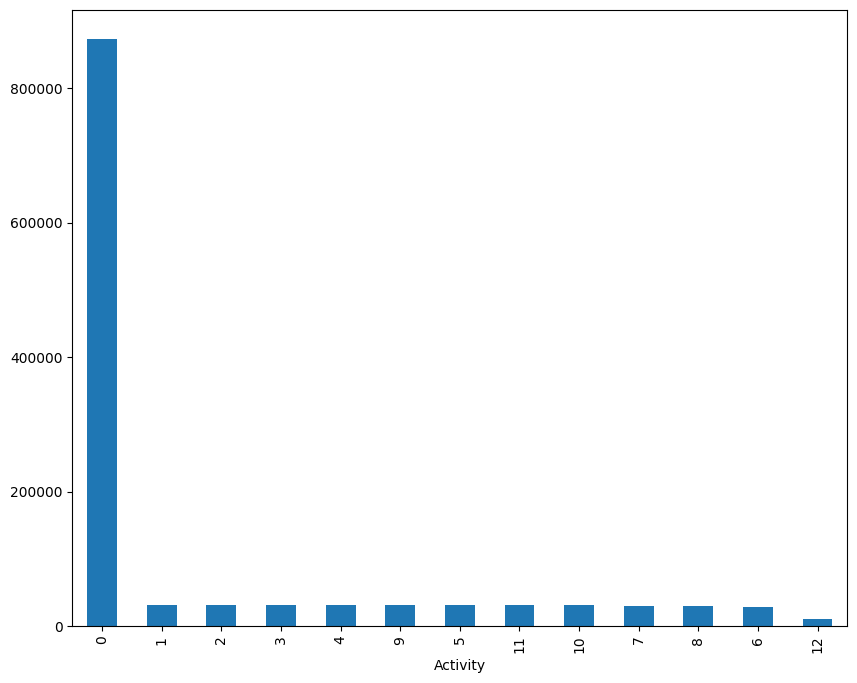

In [32]:
plt.figure(figsize=(10,8))
df['Activity'].value_counts().plot.bar()

In [33]:
#since the data for 0 is too big, we will try to minimize it to match the other data
data_activity_0 = df[df["Activity"]==0]
data_activity_else = df[df["Activity"]!=0]
data_activity_0 = data_activity_0.sample(n=40000)
df=pd.concat([data_activity_0,data_activity_else])

<Axes: xlabel='Activity'>

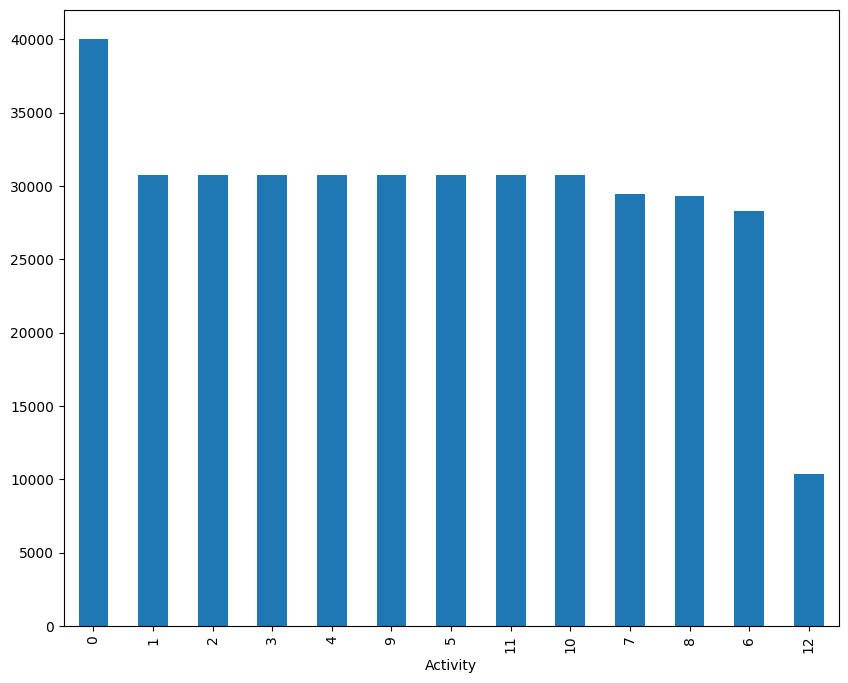

In [34]:
plt.figure(figsize=(10,8))
df['Activity'].value_counts().plot.bar()

In [35]:
activity_label = {
    0: "none",
    1: "Standing still (1 min)",
    2: "Sitting and relaxing (1 min)",
    3: "Lying down (1 min)",
    4: "Walking (1 min)",
    5: "InClimbing stairs (1 min)",
    6: "Waist bends forward (20x)",
    7: "Frontal elevation of arms (20x)",
    8: "Knees bending (crouching) (20x)",
    9: "Cycling (1 min)",
    10: "Jogging (1 min)",
    11: "Running (1 min)",
    12: "Jump front & back (20x)"
}

==========================Standing still (1 min) - a==========================


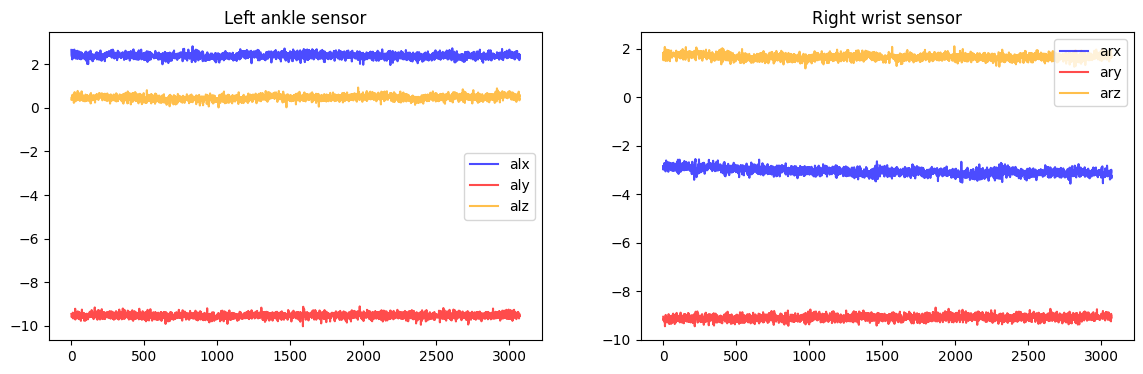

==========================Standing still (1 min) - g==========================


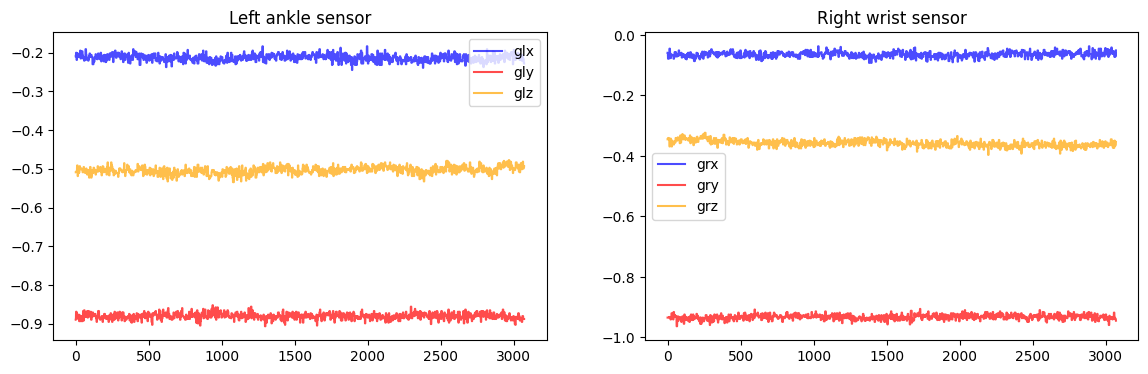

==========================Sitting and relaxing (1 min) - a==========================


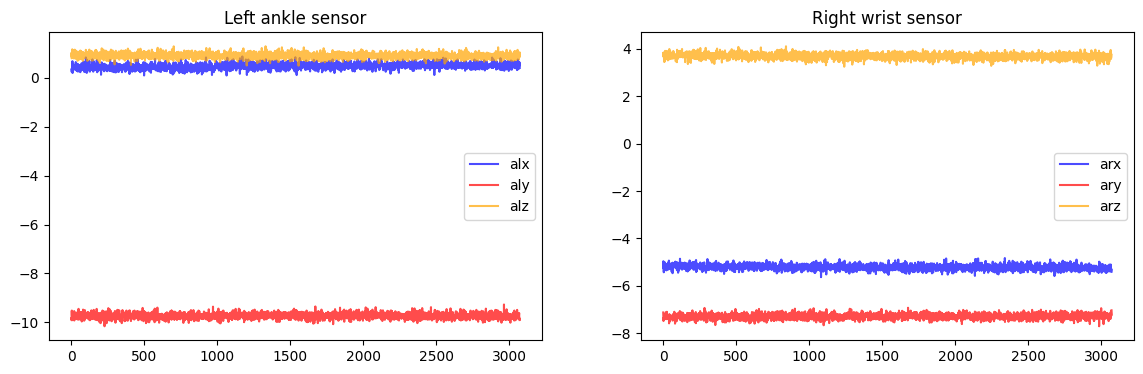

==========================Sitting and relaxing (1 min) - g==========================


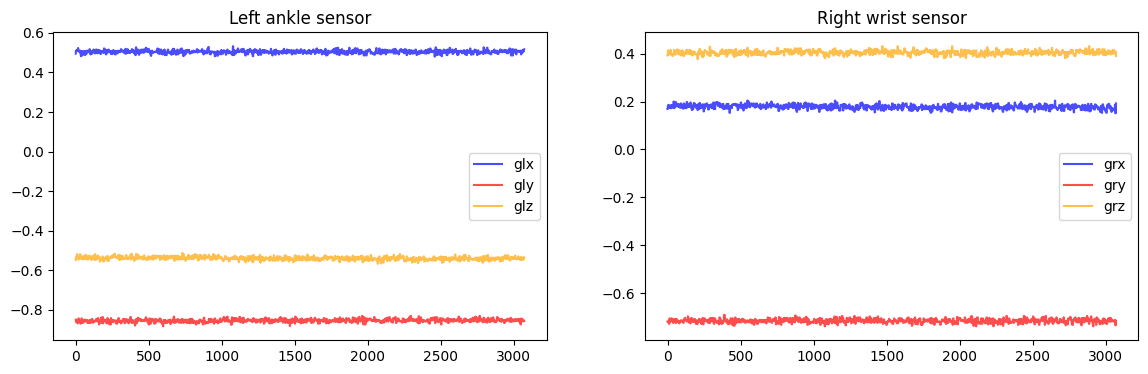

==========================Lying down (1 min) - a==========================


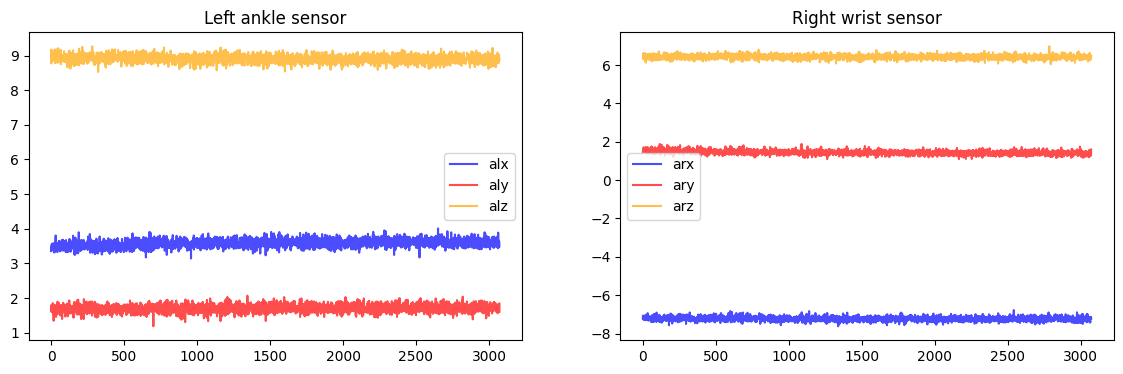

==========================Lying down (1 min) - g==========================


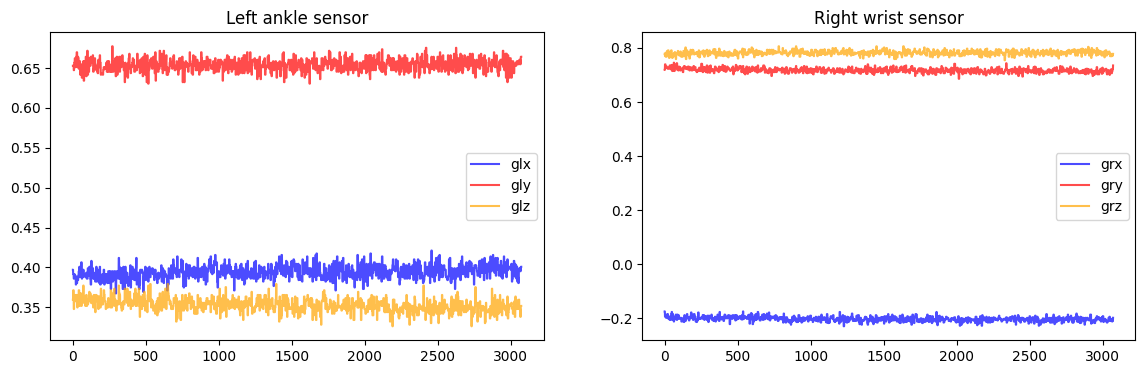

==========================Walking (1 min) - a==========================


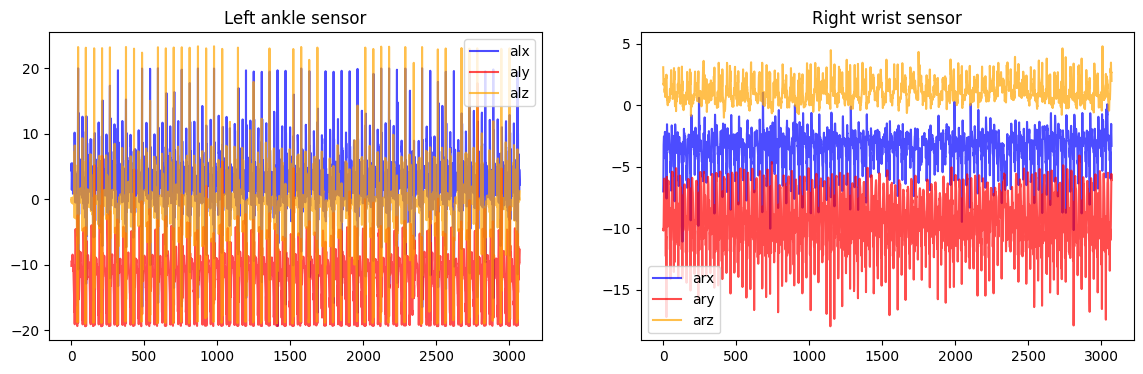

==========================Walking (1 min) - g==========================


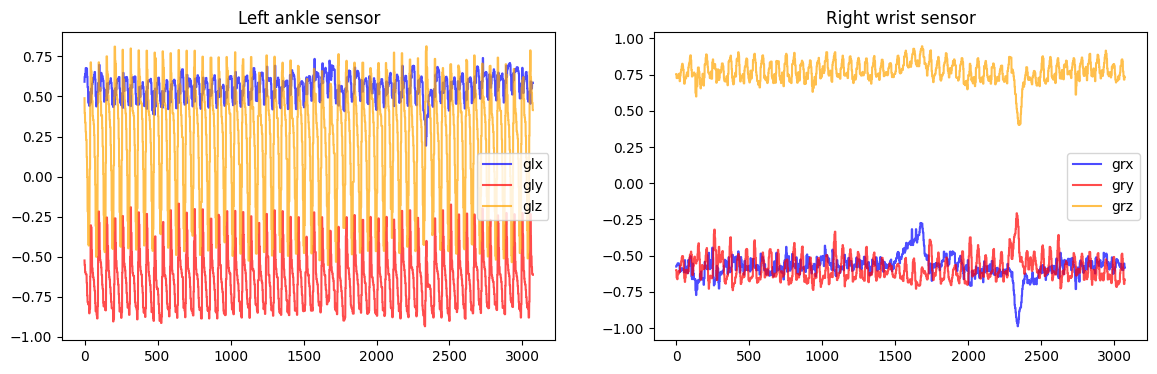

==========================InClimbing stairs (1 min) - a==========================


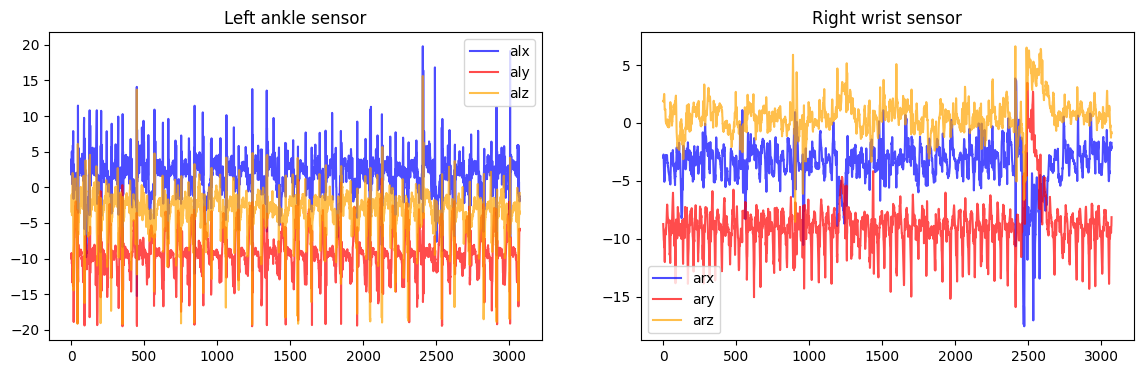

==========================InClimbing stairs (1 min) - g==========================


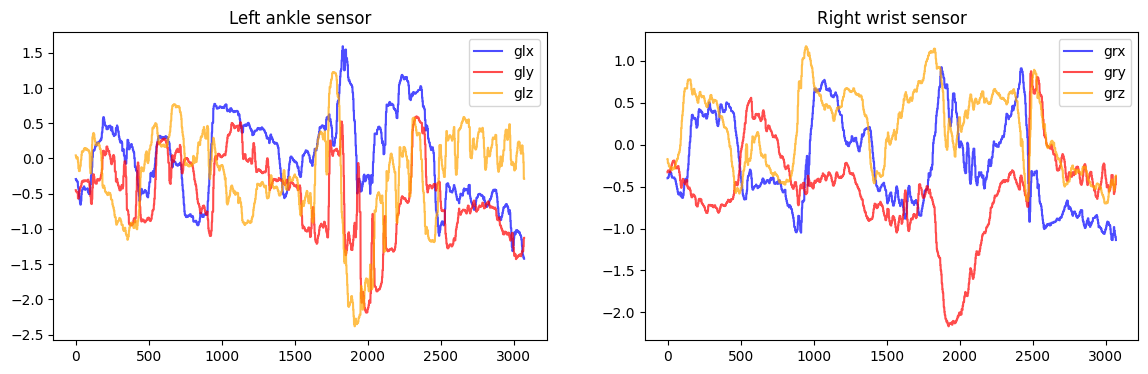

==========================Waist bends forward (20x) - a==========================


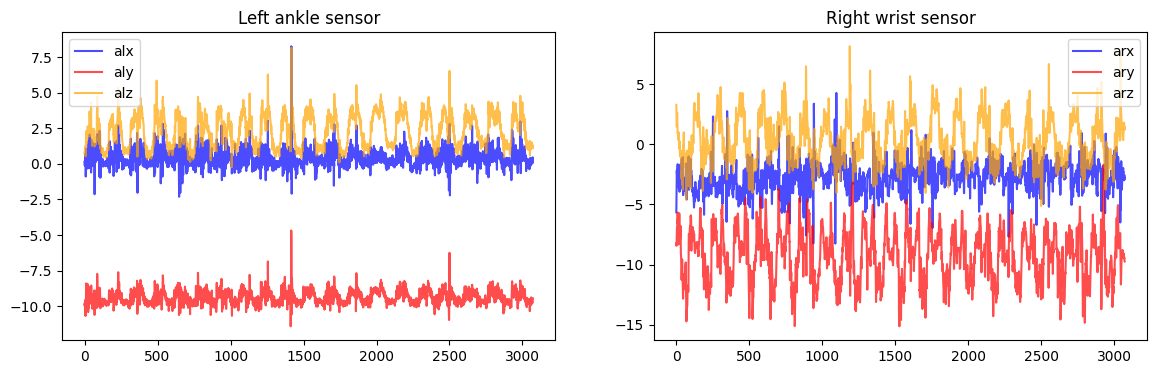

==========================Waist bends forward (20x) - g==========================


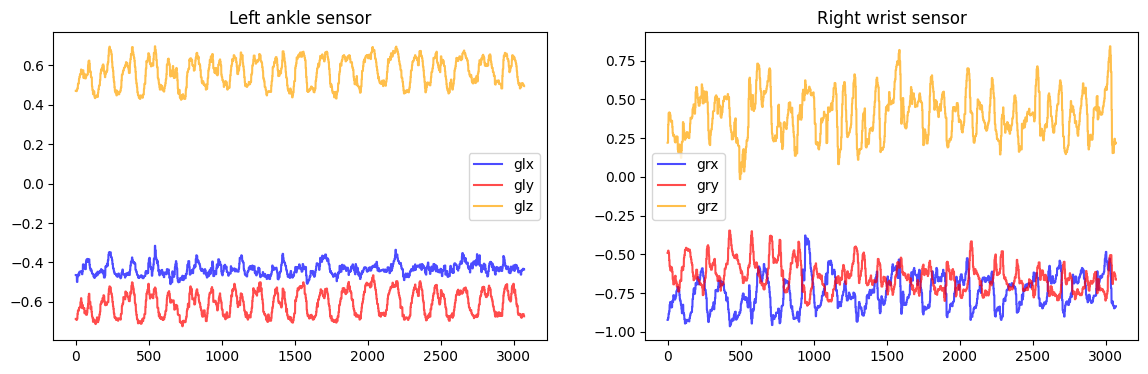

==========================Frontal elevation of arms (20x) - a==========================


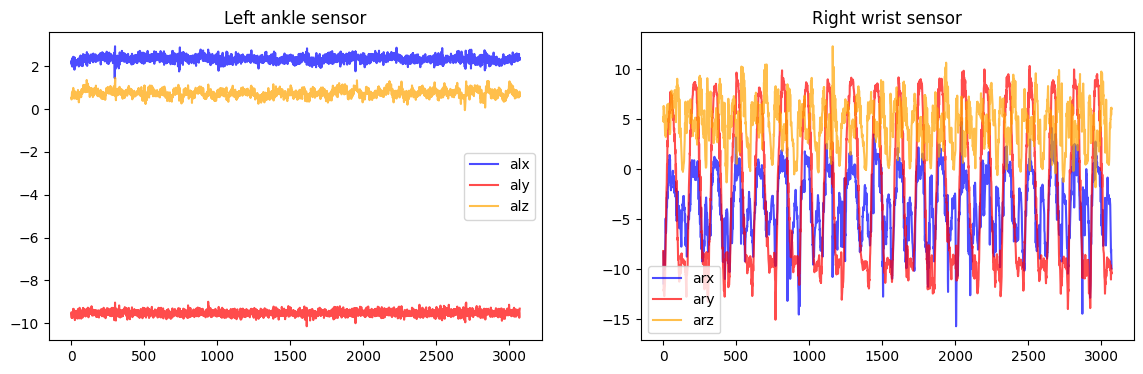

==========================Frontal elevation of arms (20x) - g==========================


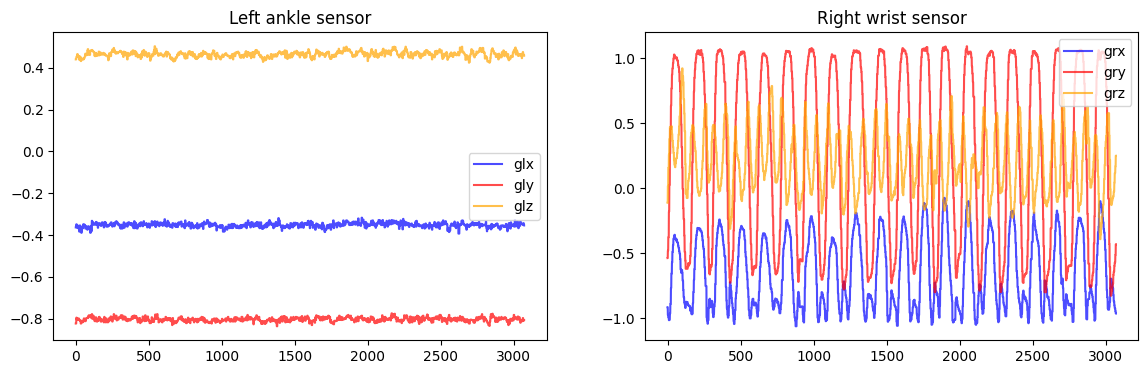

==========================Knees bending (crouching) (20x) - a==========================


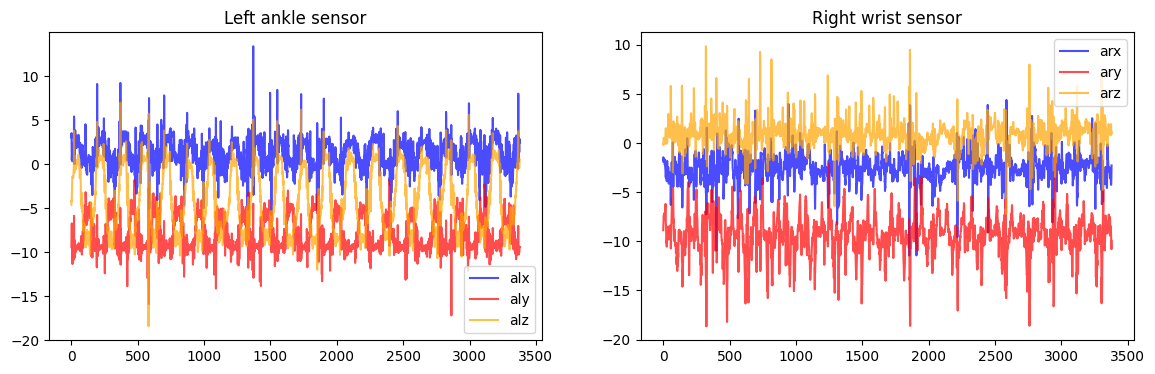

==========================Knees bending (crouching) (20x) - g==========================


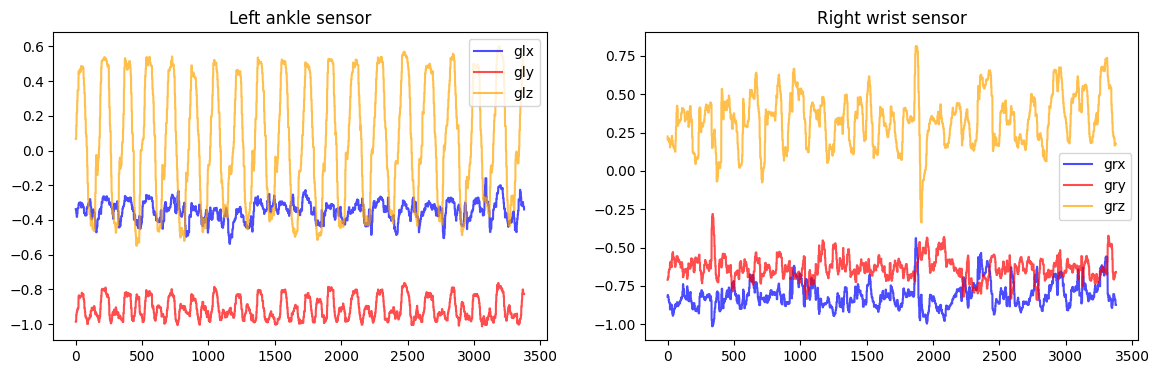

==========================Cycling (1 min) - a==========================


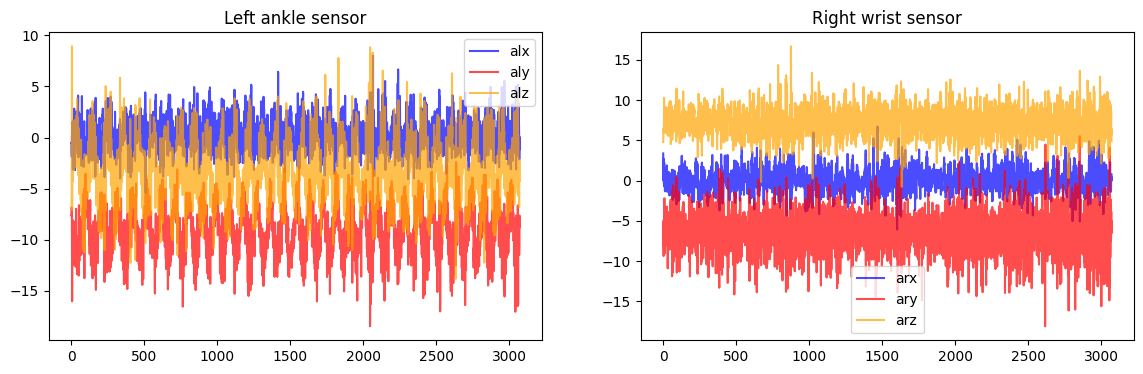

==========================Cycling (1 min) - g==========================


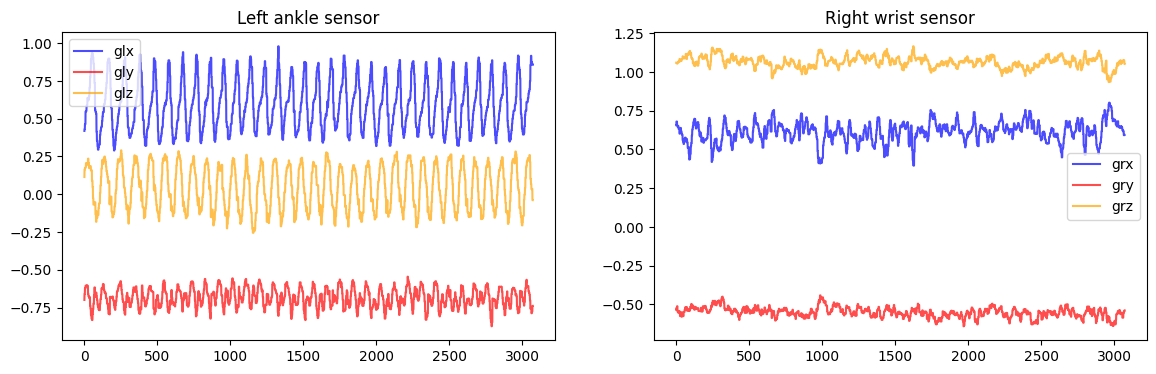

==========================Jogging (1 min) - a==========================


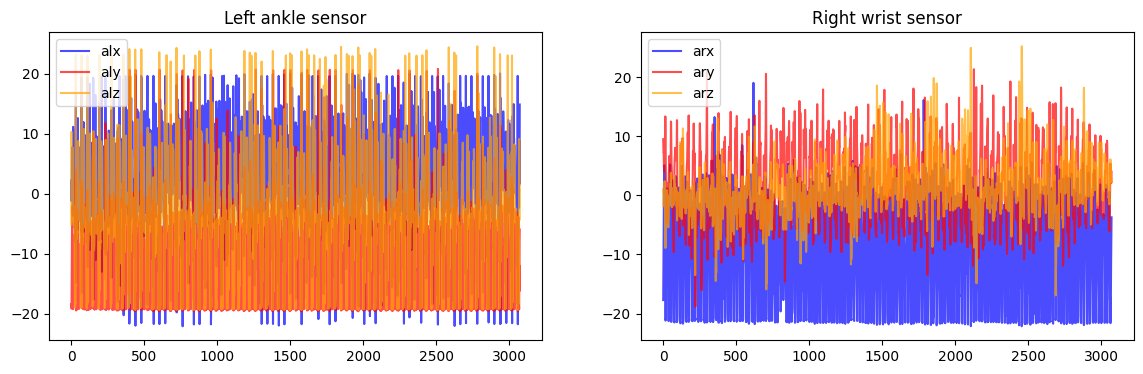

==========================Jogging (1 min) - g==========================


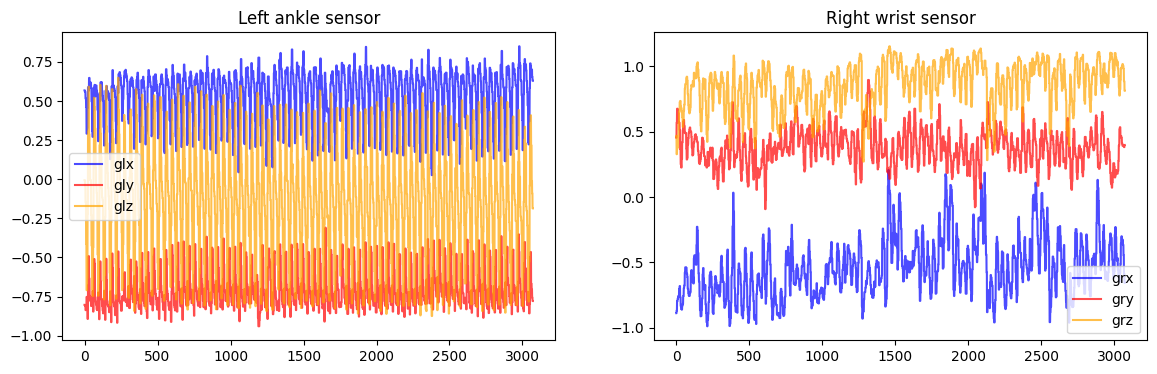

==========================Running (1 min) - a==========================


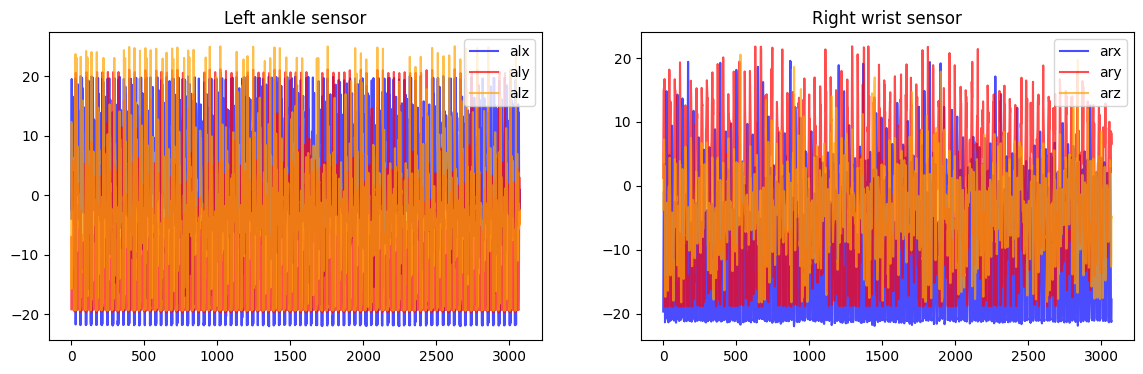

==========================Running (1 min) - g==========================


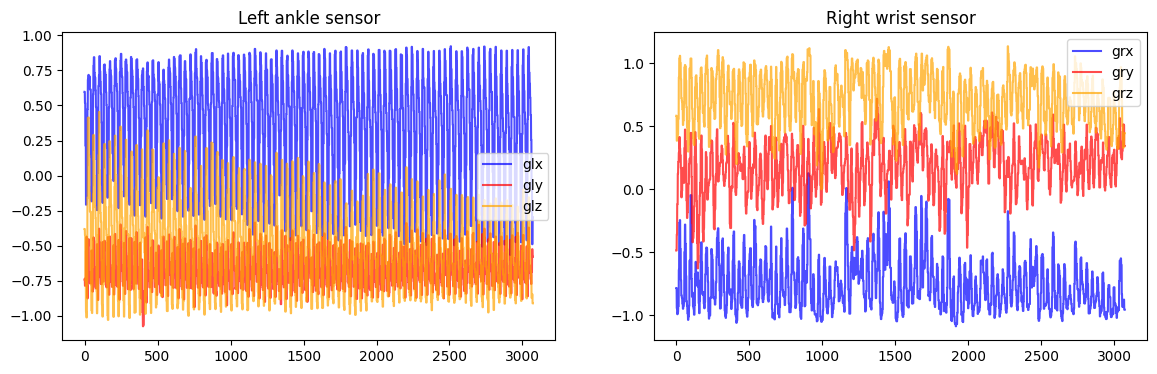

==========================Jump front & back (20x) - a==========================


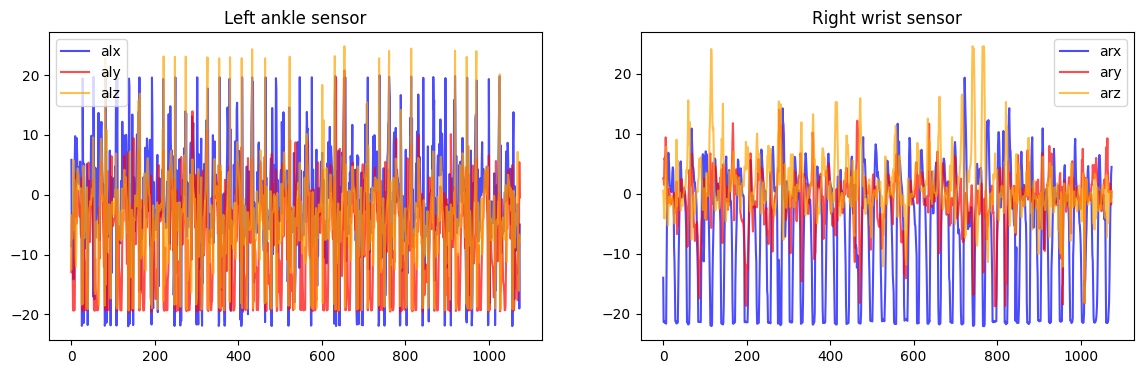

==========================Jump front & back (20x) - g==========================


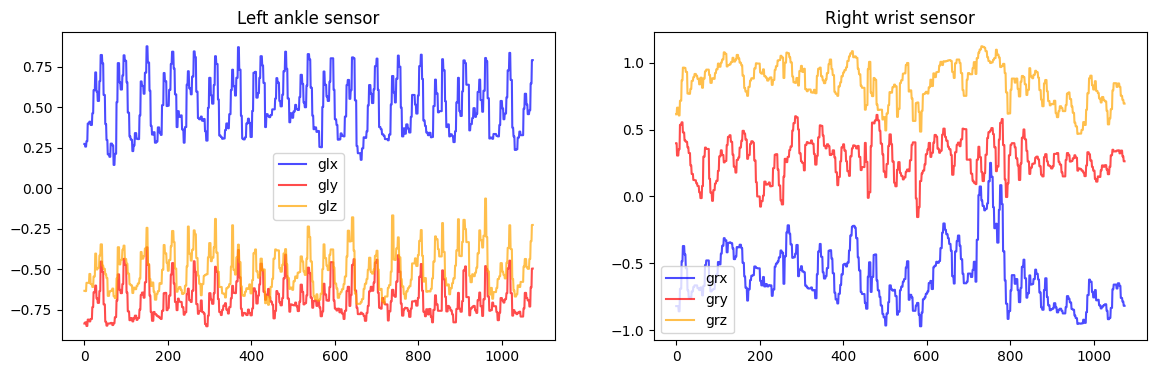

In [36]:
subject1 = df[df['subject'] == 'subject1']
readings = ['a', 'g']
for i in range(1, 13):
    for r in readings:
        print(f"=========================={activity_label[i]} - {r}==========================")
        plt.figure(figsize=(14, 4))
        plt.subplot(1, 2, 1)
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + 'lx'],
                 color='blue', alpha=0.7, label=r + 'lx')
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + 'ly'],
                 color='red', alpha=0.7, label=r + 'ly')
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + 'lz'],
                 color='orange', alpha=0.7, label=r + 'lz')
        plt.title("Left ankle sensor")
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + 'rx'],
                 color='blue', alpha=0.7, label=r + 'rx')
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + 'ry'],
                 color='red', alpha=0.7, label=r + 'ry')
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + 'rz'],
                 color='orange', alpha=0.7, label=r + 'rz')
        plt.title("Right wrist sensor")
        plt.legend()
        plt.show()

==========================Standing still (1 min) - a==========================


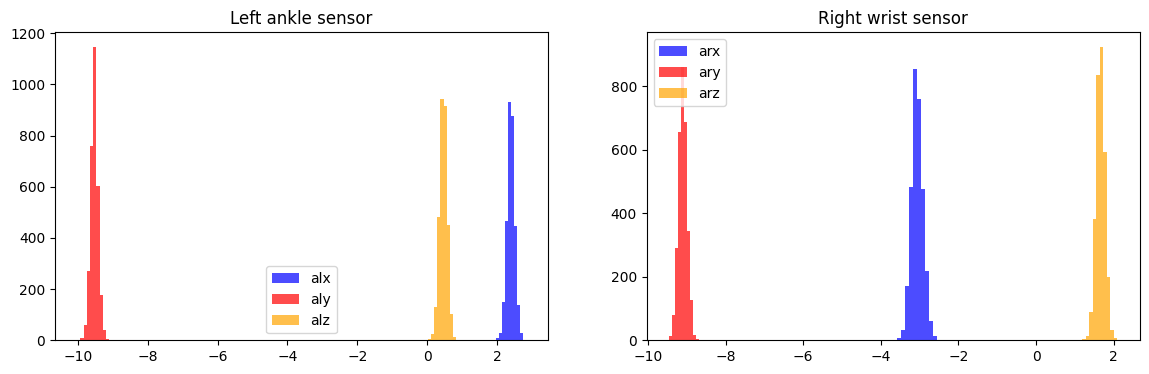

==========================Standing still (1 min) - g==========================


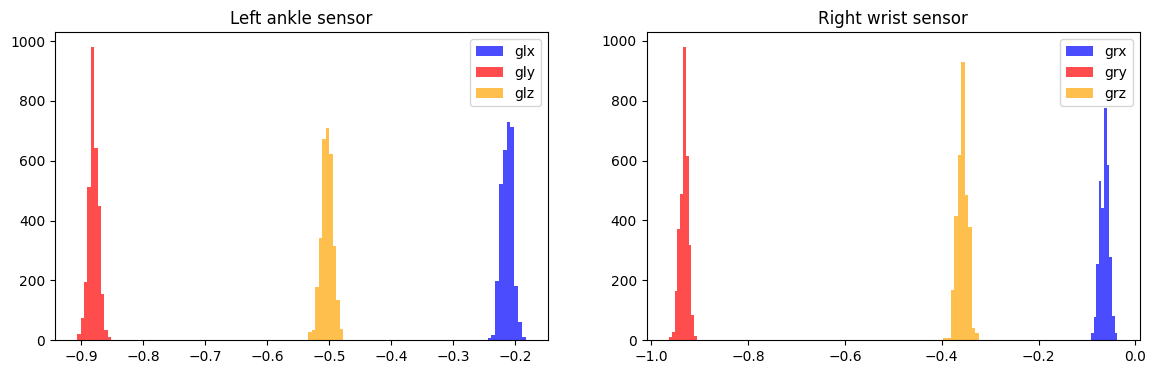

==========================Sitting and relaxing (1 min) - a==========================


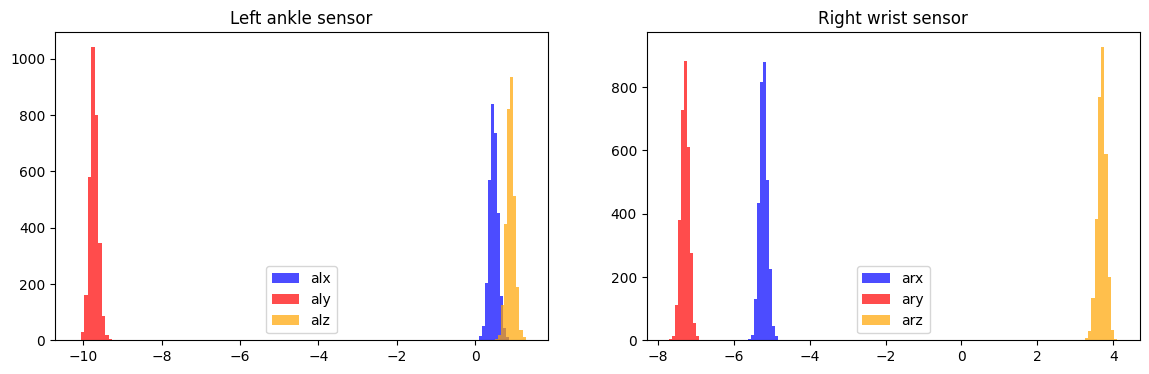

==========================Sitting and relaxing (1 min) - g==========================


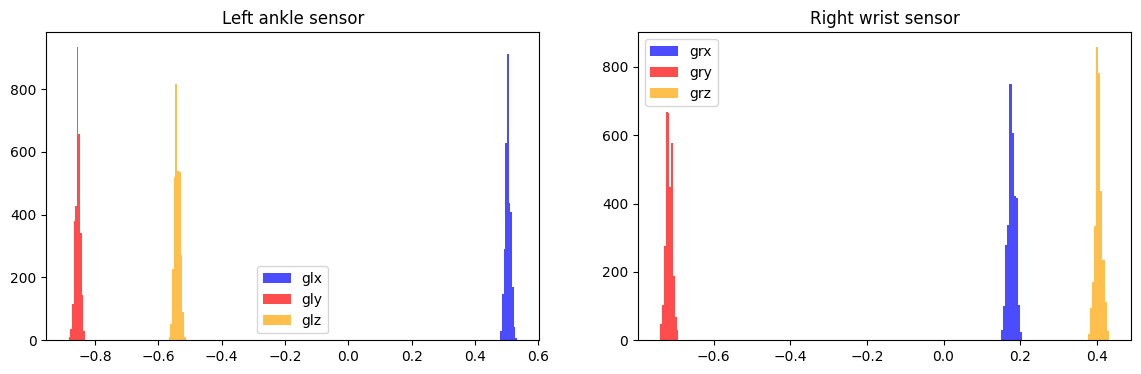

==========================Lying down (1 min) - a==========================


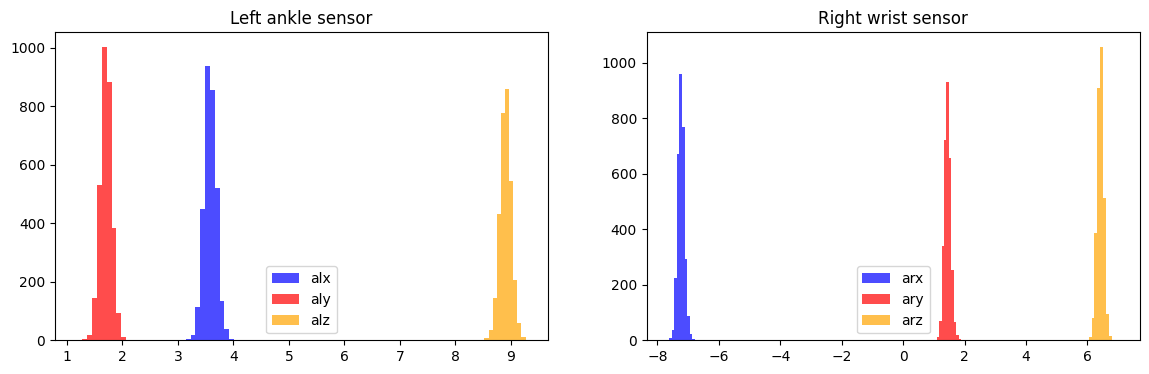

==========================Lying down (1 min) - g==========================


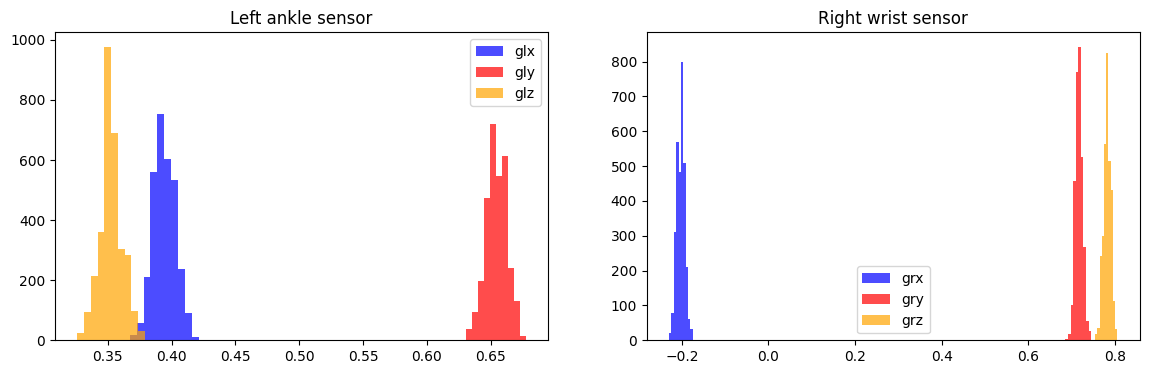

==========================Walking (1 min) - a==========================


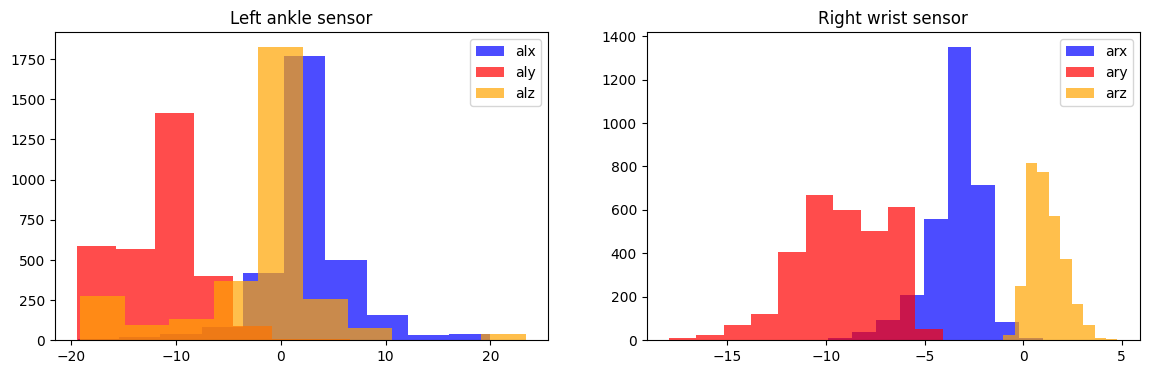

==========================Walking (1 min) - g==========================


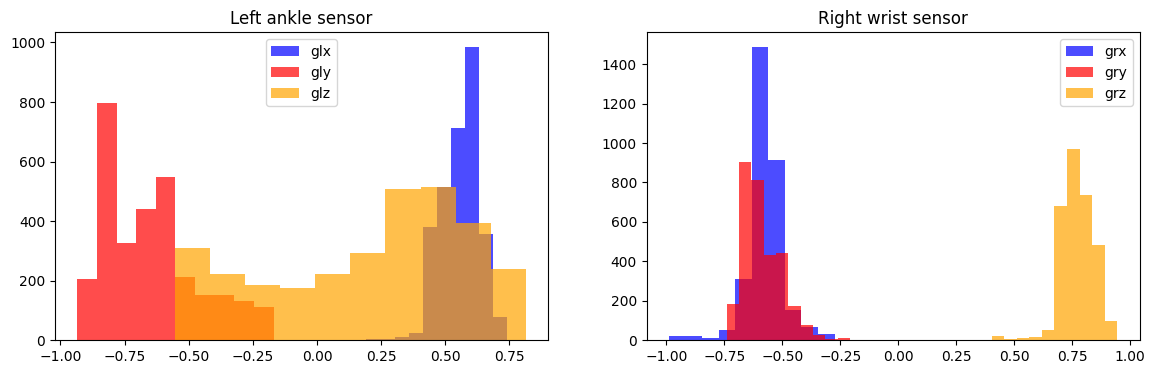

==========================InClimbing stairs (1 min) - a==========================


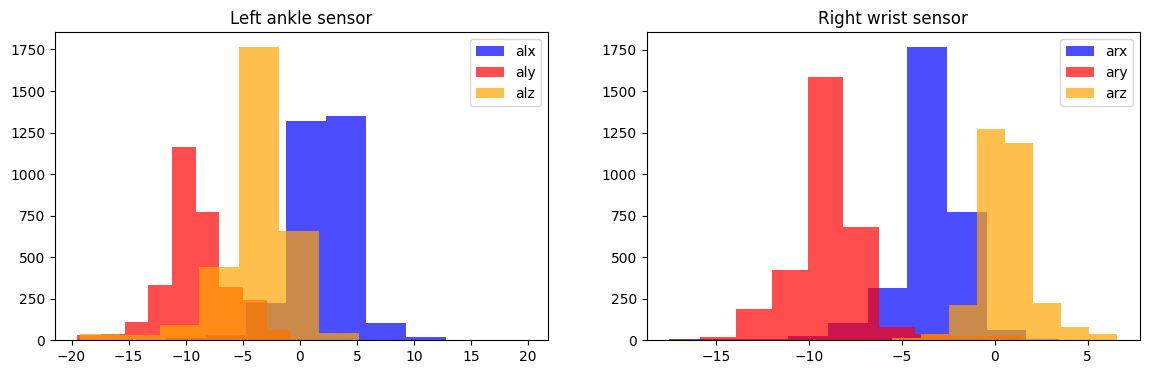

==========================InClimbing stairs (1 min) - g==========================


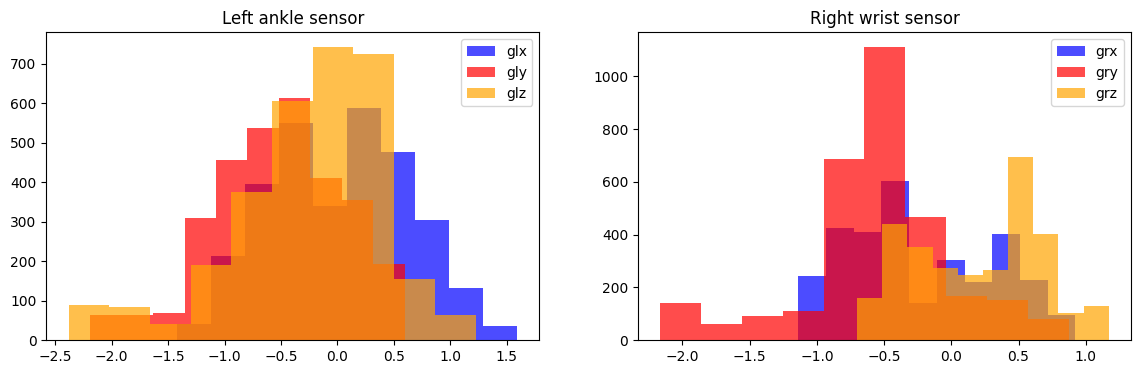

==========================Waist bends forward (20x) - a==========================


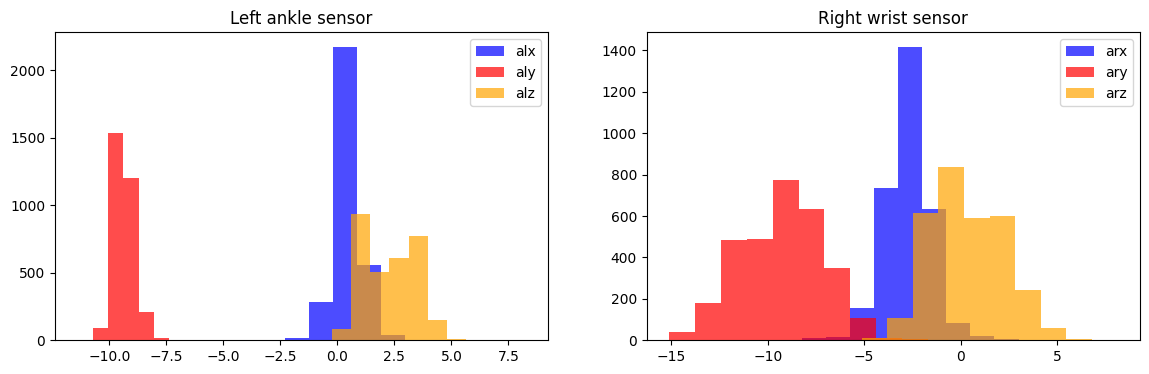

==========================Waist bends forward (20x) - g==========================


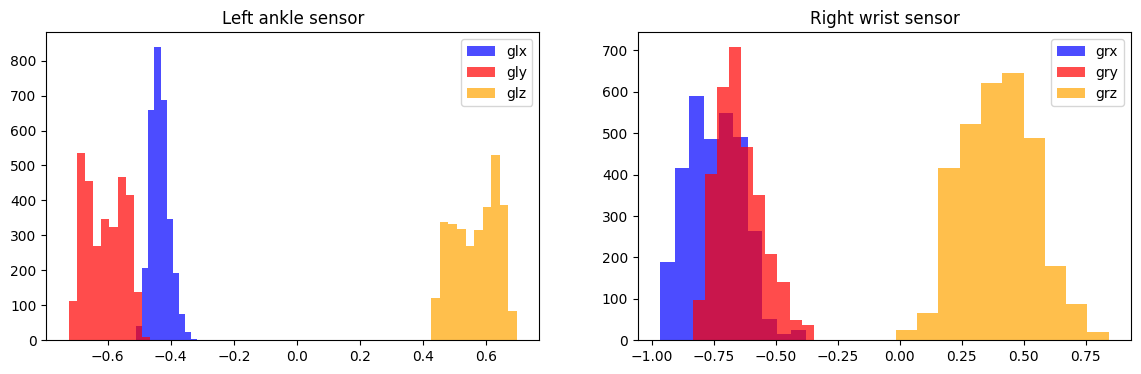

==========================Frontal elevation of arms (20x) - a==========================


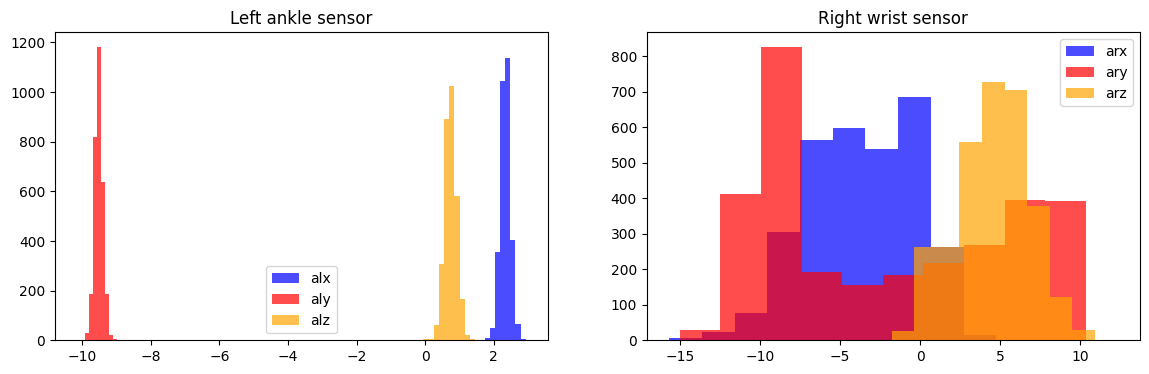

==========================Frontal elevation of arms (20x) - g==========================


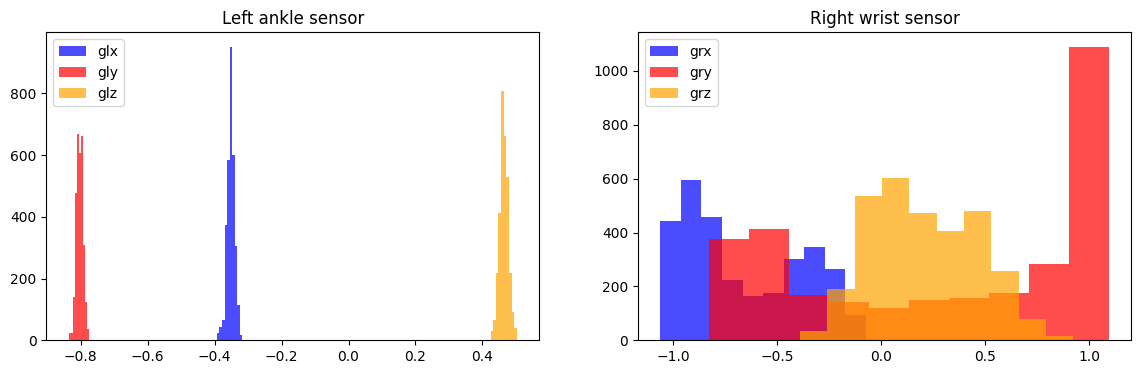

==========================Knees bending (crouching) (20x) - a==========================


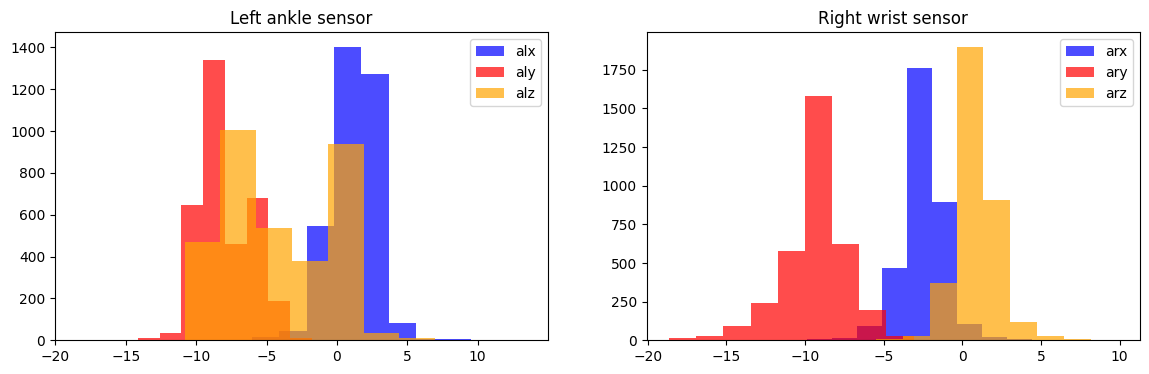

==========================Knees bending (crouching) (20x) - g==========================


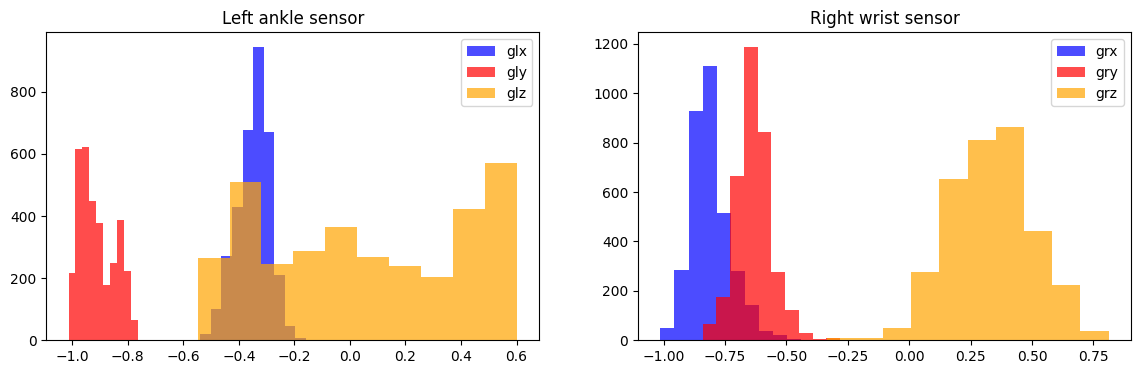

==========================Cycling (1 min) - a==========================


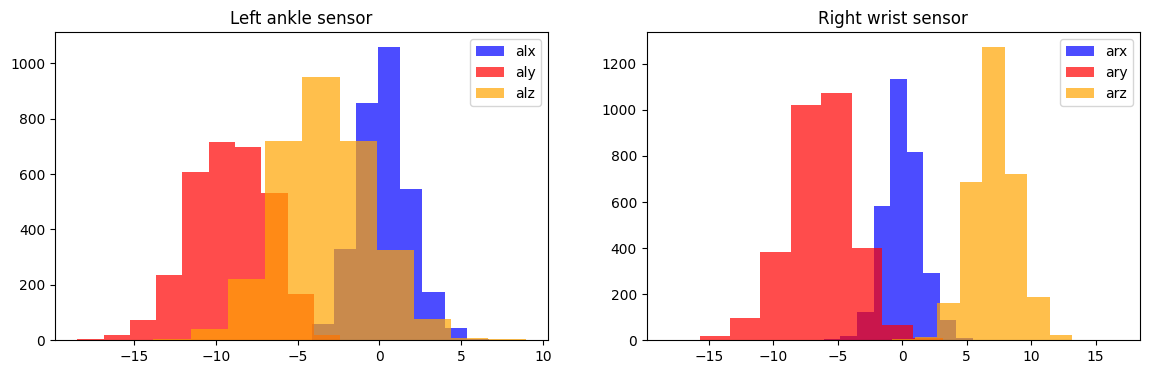

==========================Cycling (1 min) - g==========================


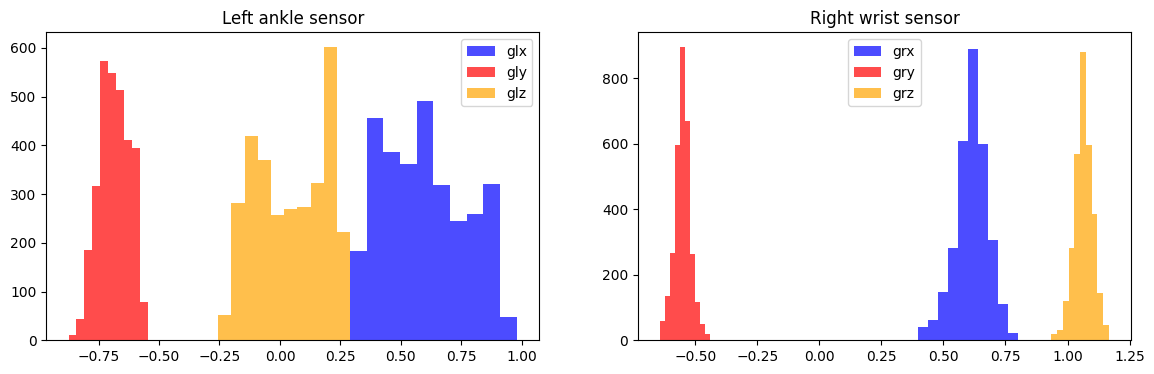

==========================Jogging (1 min) - a==========================


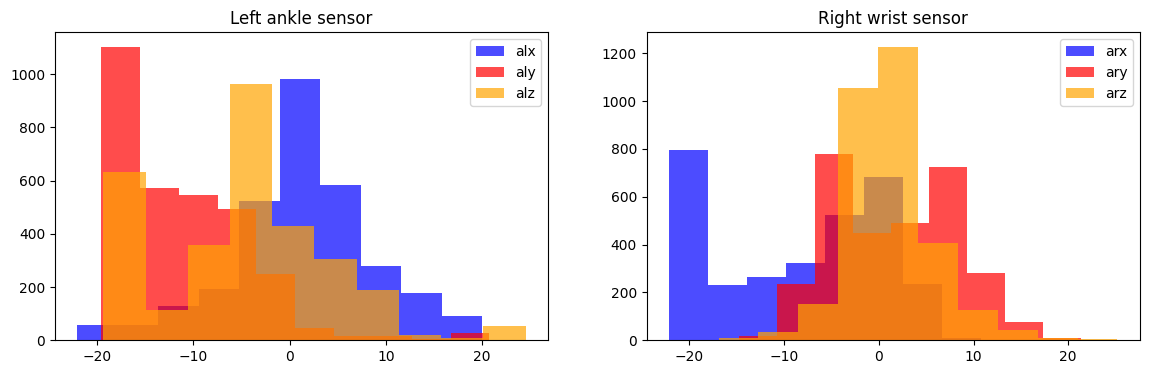

==========================Jogging (1 min) - g==========================


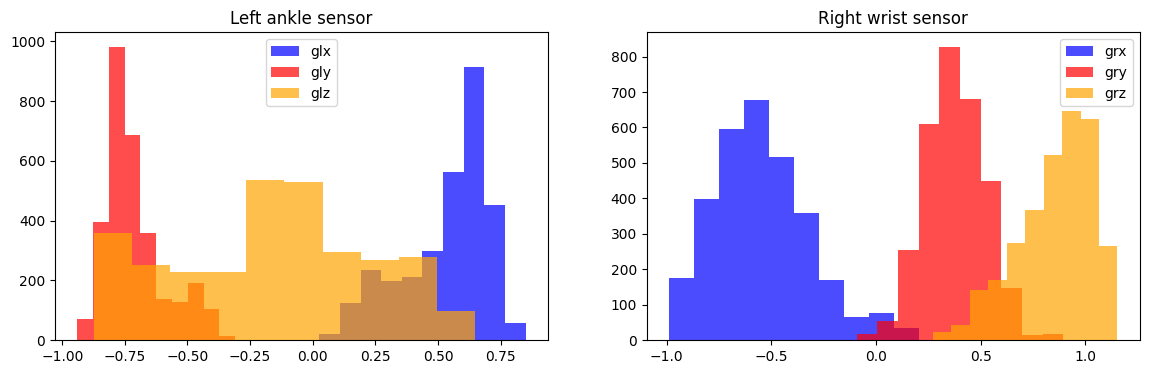

==========================Running (1 min) - a==========================


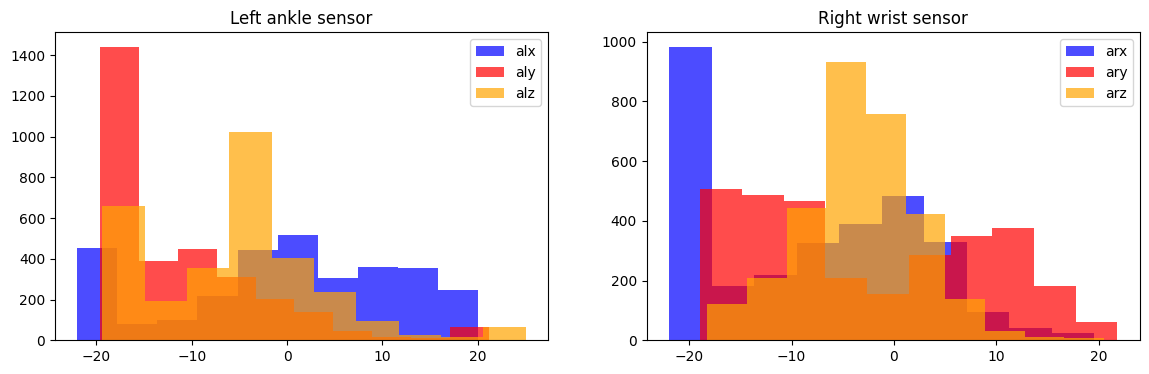

==========================Running (1 min) - g==========================


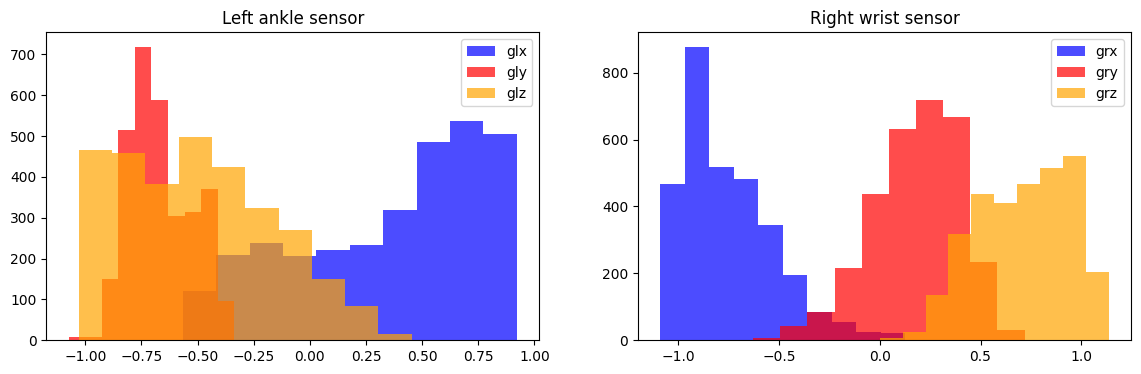

==========================Jump front & back (20x) - a==========================


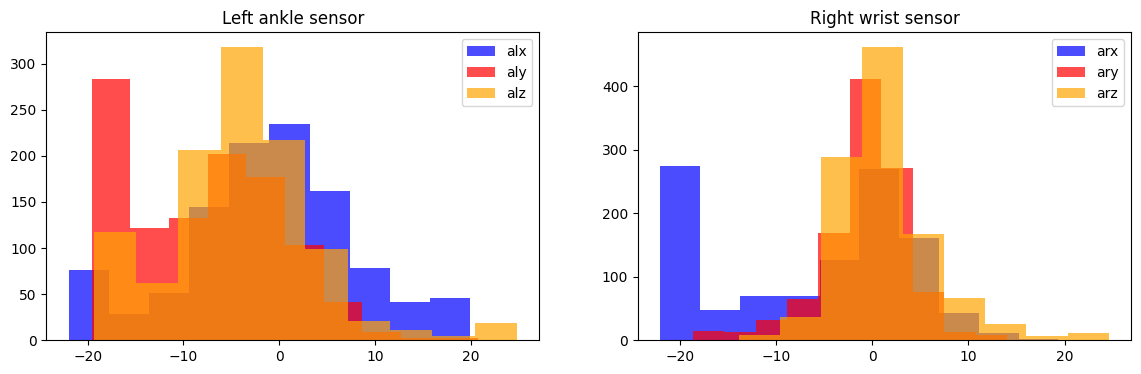

==========================Jump front & back (20x) - g==========================


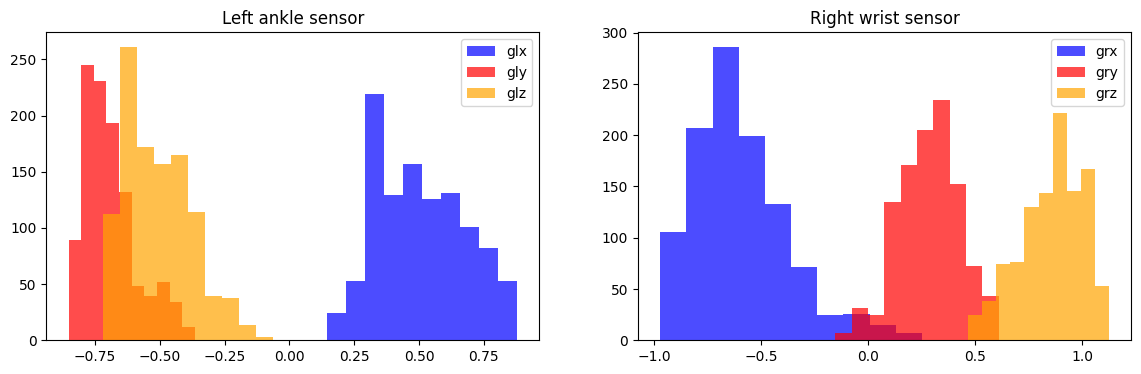

In [37]:
for i in range(1, 13):
    for r in readings:
        print(f"=========================={activity_label[i]} - {r}==========================")
        plt.figure(figsize=(14, 4))
        plt.subplot(1, 2, 1)
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + 'lx'],
                 color='blue', alpha=0.7, label=r + 'lx')
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + 'ly'],
                 color='red', alpha=0.7, label=r + 'ly')
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + 'lz'],
                 color='orange', alpha=0.7, label=r + 'lz')
        plt.title("Left ankle sensor")
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + 'rx'],
                 color='blue', alpha=0.7, label=r + 'rx')
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + 'ry'],
                 color='red', alpha=0.7, label=r + 'ry')
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + 'rz'],
                 color='orange', alpha=0.7, label=r + 'rz')
        plt.title("Right wrist sensor")
        plt.legend()
        plt.show()

In [38]:
df['Activity'] = df['Activity'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12],["none","Standing still (1 min)","Sitting and relaxing (1 min)","Lying down (1 min)","Walking (1 min)","InClimbing stairs (1 min)","Waist bends forward (20x)","Frontal elevation of arms (20x)","Knees bending (crouching) (20x)", "Cycling (1 min)","Jogging (1 min)","Running (1 min)","Jump front & back (20x)"])
df["Activity"]

695762                        none
223668                        none
756494                        none
888009                        none
725225                        none
                    ...           
1213641    Jump front & back (20x)
1213642    Jump front & back (20x)
1213643    Jump front & back (20x)
1213644    Jump front & back (20x)
1213645    Jump front & back (20x)
Name: Activity, Length: 383195, dtype: object

In [39]:
df1 = df.copy()
for feature in df1.columns[:-2]:
    lower_range = np.quantile(df[feature], 0.01)
    upper_range = np.quantile(df[feature], 0.99)
    print(feature,"range: ", lower_range, "to", upper_range)

    df1 = df1.drop(df1[(df1[feature] > upper_range) | (df1[feature] < lower_range)].index)

alx range:  -11.48606 to 19.229059999999997
aly range:  -19.379 to 2.3827119999999993
alz range:  -18.949 to 14.099239999999991
glx range:  -0.75325 to 0.80891
gly range:  -1.0657 to 0.96623
glz range:  -1.1061 to 0.8290799999999999
arx range:  -21.487 to 9.009259999999998
ary range:  -18.691 to 11.828059999999997
arz range:  -10.251059999999999 to 11.777059999999997
grx range:  -1.0216 to 0.9549
gry range:  -1.1437 to 0.9117
grz range:  -0.7069 to 1.125


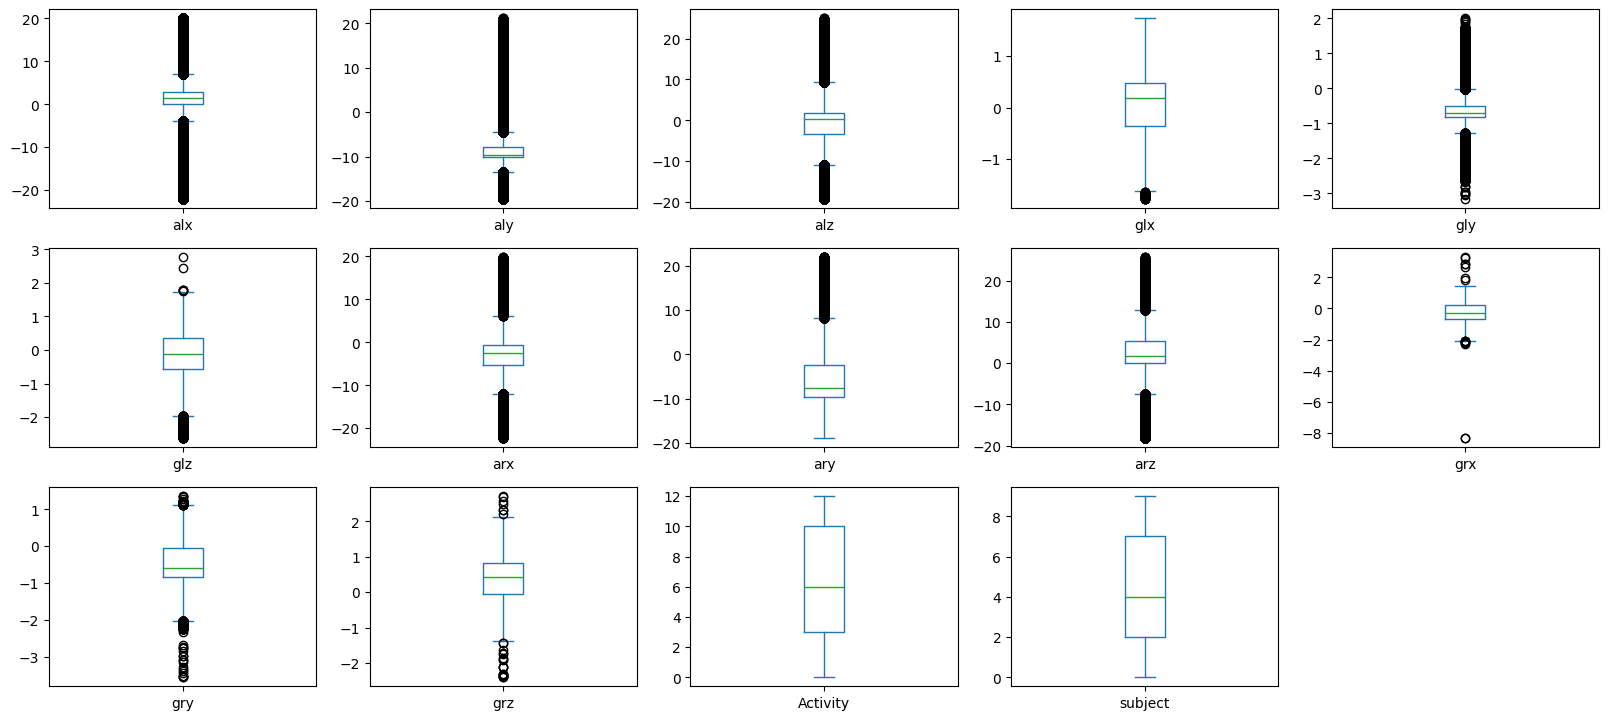

In [40]:
#data processing
le = LabelEncoder()
df['subject'] = le.fit_transform(df['subject'])
df['Activity'] = le.fit_transform(df["Activity"])
df.plot(kind='box',subplots = True, layout = (5,5),figsize=(20,15))
plt.show()

In [41]:
x = df.drop(['Activity','subject'],axis=1).values
y = df['Activity'].values 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
ro_scaler = RobustScaler().fit(x_train)
x_train_scaled = ro_scaler.transform(x_train)
x_test_scaled = ro_scaler.transform(x_test)

In [52]:
#model
def resultsSummerizer(y_true,y_pred , cm_en = True):
    cm = confusion_matrix(y_true,y_pred)
    acc = accuracy_score(y_true,y_pred)
    prec = precision_score(y_true,y_pred,average='macro')
    rec = sensitivity = recall_score(y_true,y_pred,average='macro')
    f1 = f1_score(y_true,y_pred,average= "macro")
    if cm_en:
        plt.figure(figsize=(15,15))
        sns.heatmap(cm, annot= True,cmap="Blues",xticklabels=activity_label.values(),yticklabels=activity_label.values())
        plt.title('confusion_matrix')
        plt.show()
    print(f"Accuracy Score: "+"{:.4%}".format(acc))
    print(f"Precision Score: "+"{:.4%}".format(prec))
    print(f"Recall Score: "+"{:.4%}".format(rec))
    print(f"F1_sc Score: "+"{:.4%}".format(f1))

In [43]:
#logistic regression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_train, y_train)

d:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5425510445517683

In [44]:
lr.score(x_test, y_test)
lr2 = LogisticRegression()
lr2.fit(x_train_scaled,y_train)
lr2.score(x_train_scaled,y_train)


d:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.552502470458879

In [45]:
lr2.score(x_test_scaled,y_test)

0.5543272894289084

In [46]:
y_pred_lr = lr2.predict(x_test_scaled)

In [47]:
# KNN
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(x_train, y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [57]:
y_pred_knn = knn1.predict(x_test)
resultsSummerizer(y_test,y_pred_knn,cm_en=False)

Accuracy Score: 88.5479%
Precision Score: 88.0975%
Recall Score: 88.3848%
F1_sc Score: 87.7324%


In [58]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(x_train_scaled,y_train)
y_pred_knn = knn2.predict(x_test_scaled)
resultsSummerizer(y_test,y_pred_knn,cm_en=False)

Accuracy Score: 93.7264%
Precision Score: 93.5394%
Recall Score: 93.4833%
F1_sc Score: 93.1338%


In [59]:
for n in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train_scaled,y_train)
    y_pred = knn.predict(x_test_scaled)
    print(f"No of Neighbours: {n}\n")
    resultsSummerizer(y_test,y_pred,cm_en=False )


No of Neighbours: 1

Accuracy Score: 93.9770%
Precision Score: 93.7274%
Recall Score: 93.7730%
F1_sc Score: 93.6446%
No of Neighbours: 2

Accuracy Score: 93.4801%
Precision Score: 93.2548%
Recall Score: 93.4394%
F1_sc Score: 92.8802%
No of Neighbours: 3

Accuracy Score: 94.0793%
Precision Score: 93.8665%
Recall Score: 93.8598%
F1_sc Score: 93.5626%
No of Neighbours: 4

Accuracy Score: 93.5678%
Precision Score: 93.4304%
Recall Score: 93.3888%
F1_sc Score: 92.9713%
No of Neighbours: 5

Accuracy Score: 93.7264%
Precision Score: 93.5394%
Recall Score: 93.4833%
F1_sc Score: 93.1338%
No of Neighbours: 6

Accuracy Score: 93.3976%
Precision Score: 93.2761%
Recall Score: 93.1936%
F1_sc Score: 92.7684%
No of Neighbours: 7

Accuracy Score: 93.4676%
Precision Score: 93.3207%
Recall Score: 93.1954%
F1_sc Score: 92.8387%
No of Neighbours: 8

Accuracy Score: 93.1690%
Precision Score: 93.0753%
Recall Score: 92.8839%
F1_sc Score: 92.4817%
No of Neighbours: 9

Accuracy Score: 93.2306%
Precision Score: 9

d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


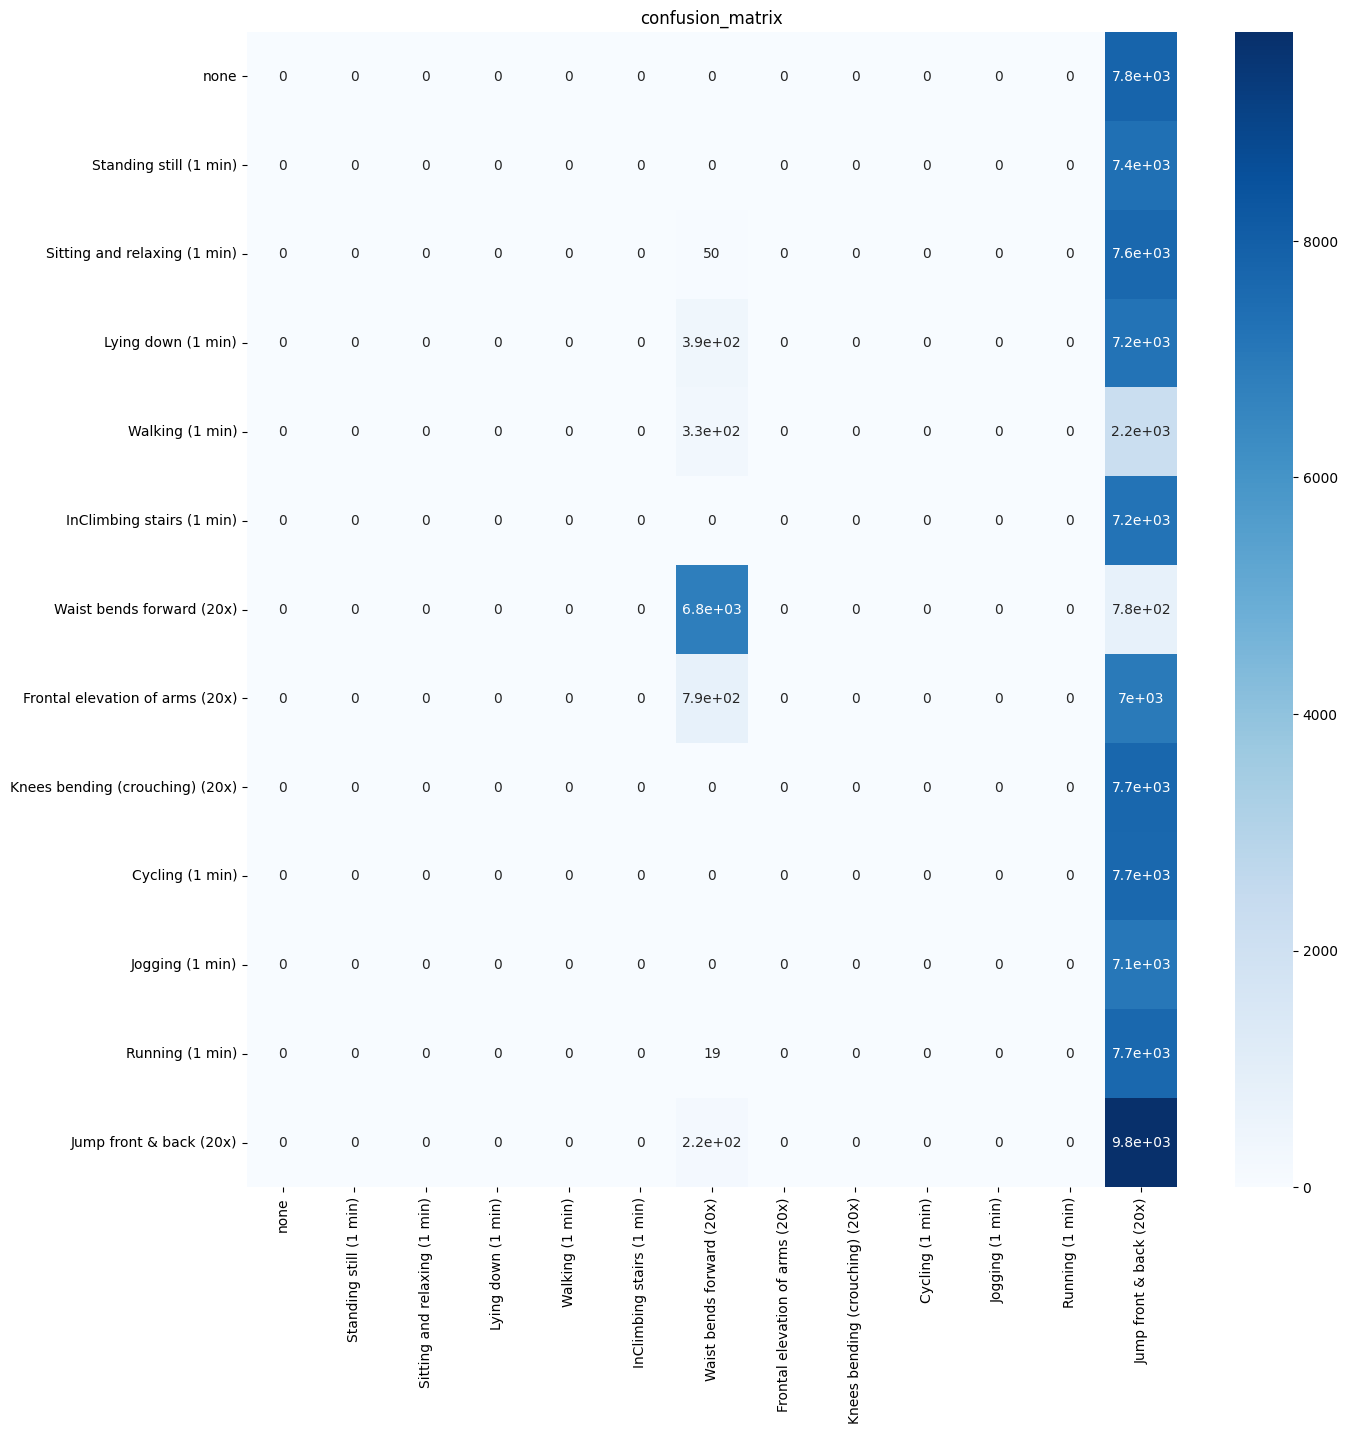

Accuracy Score: 17.3405%
Precision Score: 6.9534%
Recall Score: 14.4280%
F1_sc Score: 8.0190%


In [60]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
resultsSummerizer(y_test,y_pred_dt)